In [1]:
import os
#import sys
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

#sys.path.append('../')
from data.load_data import *
from models.neural_networks import *
from train.train_cnn import *
from train.train_fcn import *
from evaluation.test import *
from utils.others import *
from utils.plot import *
from utils.save_model import *


# Pretrain a CNN

architecture: ConvLayers([(3,16,5,1,2),(16,32,5,1,2)])+ FCN([32 * 8* 8,10])

In [2]:
# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1               
BATCH_SIZE = 50
LR = 0.001             
TSNE = False

In [3]:
#load CIFAR-10 dataset
train_loader, test_loader = load_cifar10(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))


50000
10000


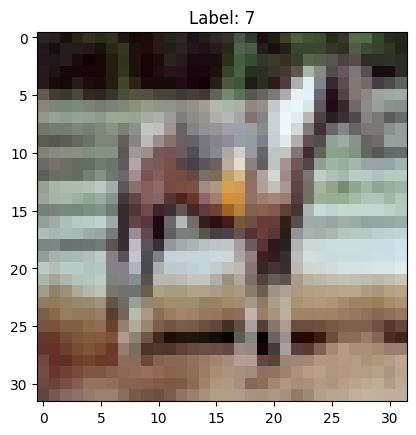

In [52]:
# Plot one example
plot_example(train_loader)

In [53]:
# create model instance
conv = ConvLayers([(3,16,5,1,2),(16,32,5,1,2)])
fcn1 = FCN([32*8*8,10])
#hebbnet = HebbNet([784,50])
#fcn2 = FCN([50,20,10]) 

cnn = CNN(conv, fcn1)
#semihebbnet = SemiHebbNet(hebbnet, fcn2)

In [54]:
# optimizer and loss function
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [55]:
# train networks
train_cnn(model=cnn, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)

Epoch: 0, Step: 0, Loss: 2.302872896194458, Accuracy: 12.21%
Epoch: 0, Step: 50, Loss: 1.9378716945648193, Accuracy: 36.16%
Epoch: 0, Step: 100, Loss: 1.6484729051589966, Accuracy: 39.44%
Epoch: 0, Step: 150, Loss: 1.4305325746536255, Accuracy: 41.65%
Epoch: 0, Step: 200, Loss: 1.4404804706573486, Accuracy: 44.55%
Epoch: 0, Step: 250, Loss: 1.4481549263000488, Accuracy: 46.18%
Epoch: 0, Step: 300, Loss: 1.2756344079971313, Accuracy: 50.29%
Epoch: 0, Step: 350, Loss: 1.2825638055801392, Accuracy: 49.48%
Epoch: 0, Step: 400, Loss: 1.244162917137146, Accuracy: 51.06%
Epoch: 0, Step: 450, Loss: 1.4419410228729248, Accuracy: 49.4%
Epoch: 0, Step: 500, Loss: 1.4141353368759155, Accuracy: 51.08%
Epoch: 0, Step: 550, Loss: 1.2902227640151978, Accuracy: 53.66%
Epoch: 0, Step: 600, Loss: 1.2525697946548462, Accuracy: 55.02%
Epoch: 0, Step: 650, Loss: 1.2648162841796875, Accuracy: 53.48%
Epoch: 0, Step: 700, Loss: 1.1865296363830566, Accuracy: 56.42%
Epoch: 0, Step: 750, Loss: 1.2495728731155396,

In [56]:
# test accuracy
test_accuracy(model=cnn, dataset='cifar10')

Accuracy of the CNN on the CIFAR10 test images: 57.44%


57.44

In [57]:
#save pretrained model
model_save_path = 'pretrained/cifar10_models/cnn.pth'
save_model(cnn, model_save_path)

Model saved at pretrained/cifar10_models/cnn.pth


In [58]:
#load model and test
new_conv = ConvLayers([(3,16,5,1,2),(16,32,5,1,2)])
new_fcn1 = FCN([32*8*8,10])
pretrained_cnn = CNN(new_conv, new_fcn1, pretrained_model_path=model_save_path)

test_accuracy(model=pretrained_cnn, dataset='cifar10')

Accuracy of the CNN on the CIFAR10 test images: 57.44%


57.44

# Pretrain a Shallower CNN

architecture: ConvLayers([(3,8,3,2,1)])+ FCN([8* 8* 8,10])    weights: 20714

In [59]:
# create model instance
conv = ConvLayers([(3,8,3,2,1)])
fcn1 = FCN([8*8*8,10])

cnn2 = CNN(conv, fcn1)

In [60]:
# optimizer and loss function
optimizer = torch.optim.Adam(cnn2.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [61]:
# train networks
train_cnn(model=cnn2, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)

Epoch: 0, Step: 0, Loss: 2.2805745601654053, Accuracy: 11.15%
Epoch: 0, Step: 50, Loss: 1.9976952075958252, Accuracy: 29.3%
Epoch: 0, Step: 100, Loss: 1.9815499782562256, Accuracy: 33.09%
Epoch: 0, Step: 150, Loss: 2.1121482849121094, Accuracy: 36.45%
Epoch: 0, Step: 200, Loss: 1.7548083066940308, Accuracy: 37.02%
Epoch: 0, Step: 250, Loss: 1.7482088804244995, Accuracy: 38.67%
Epoch: 0, Step: 300, Loss: 1.7546954154968262, Accuracy: 40.23%
Epoch: 0, Step: 350, Loss: 1.4481747150421143, Accuracy: 42.11%
Epoch: 0, Step: 400, Loss: 1.5514830350875854, Accuracy: 43.24%
Epoch: 0, Step: 450, Loss: 1.3888393640518188, Accuracy: 43.14%
Epoch: 0, Step: 500, Loss: 1.8395111560821533, Accuracy: 43.72%
Epoch: 0, Step: 550, Loss: 1.5888922214508057, Accuracy: 44.53%
Epoch: 0, Step: 600, Loss: 1.8221304416656494, Accuracy: 43.93%
Epoch: 0, Step: 650, Loss: 1.6640607118606567, Accuracy: 44.88%
Epoch: 0, Step: 700, Loss: 1.503916621208191, Accuracy: 46.48%
Epoch: 0, Step: 750, Loss: 1.365135669708252,

In [62]:
# test accuracy
test_accuracy(model=cnn2, dataset='cifar10')

Accuracy of the CNN on the CIFAR10 test images: 49.26%


49.26

In [63]:
#save pretrained model
model_save_path = 'pretrained/cifar10_models/cnn2.pth'
save_model(cnn2, model_save_path)

Model saved at pretrained/cifar10_models/cnn2.pth


In [64]:
#load model and test
new_conv = ConvLayers([(3,8,3,2,1)])
new_fcn1 = FCN([8*8*8,10])
pretrained_cnn2 = CNN(new_conv, new_fcn1, pretrained_model_path=model_save_path)

test_accuracy(model=pretrained_cnn2, dataset='cifar10')

Accuracy of the CNN on the CIFAR10 test images: 49.26%


49.26

# Pretrain a FCN with comparable parameters as the cnn2

FCN([3* 28* 28,8,8,10]) with 24746 trainable weights

In [65]:
fcn = FCN([3*32*32,8,8,10])

In [66]:
# optimizer and loss function
optimizer = torch.optim.Adam(fcn.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [67]:
# train networks
train_fcn(model=fcn, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH)

Epoch: 0, Step: 0, Loss: 2.375051975250244, Accuracy: 12.63%
Epoch: 0, Step: 50, Loss: 2.0096302032470703, Accuracy: 28.07%
Epoch: 0, Step: 100, Loss: 1.8975344896316528, Accuracy: 31.93%
Epoch: 0, Step: 150, Loss: 1.7564185857772827, Accuracy: 31.01%
Epoch: 0, Step: 200, Loss: 1.763726830482483, Accuracy: 33.08%
Epoch: 0, Step: 250, Loss: 1.9756667613983154, Accuracy: 33.89%
Epoch: 0, Step: 300, Loss: 1.552008867263794, Accuracy: 35.08%
Epoch: 0, Step: 350, Loss: 1.8563122749328613, Accuracy: 36.06%
Epoch: 0, Step: 400, Loss: 1.6603002548217773, Accuracy: 35.74%
Epoch: 0, Step: 450, Loss: 1.7780879735946655, Accuracy: 35.56%
Epoch: 0, Step: 500, Loss: 1.6689671277999878, Accuracy: 34.82%
Epoch: 0, Step: 550, Loss: 1.7710047960281372, Accuracy: 36.07%
Epoch: 0, Step: 600, Loss: 1.5388604402542114, Accuracy: 36.68%
Epoch: 0, Step: 650, Loss: 1.8638691902160645, Accuracy: 36.53%
Epoch: 0, Step: 700, Loss: 1.962642788887024, Accuracy: 36.94%
Epoch: 0, Step: 750, Loss: 1.657322883605957, A

In [68]:
# test accuracy
test_accuracy(model=fcn, dataset='cifar10', flatten_input=True)

Accuracy of the FCN on the CIFAR10 test images: 37.44%


37.44

In [69]:
#save pretrained model
model_save_path = 'pretrained/cifar10_models/fcn.pth'
save_model(fcn, model_save_path)

Model saved at pretrained/cifar10_models/fcn.pth


In [70]:
#load model and test

pretrained_fcn = FCN([3*32*32,8,8,10],pretrained_model_path=model_save_path)
test_accuracy(model=pretrained_fcn, dataset='cifar10',flatten_input=True)

Accuracy of the FCN on the CIFAR10 test images: 37.44%


37.44